In [1]:
import requests

import codecs 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline
import seaborn as sns
sns.set()
from IPython.core.display import display, HTML
display(HTML("<style>.container { height:100% !important; }</style>"))

import re 

# Section 1 prepare data quality report


Reading from a csv file, into a data frame

In [2]:
df = pd.read_csv('CreditRisk-18206648_original.csv')

## Check how many rows and columns this dataframe has

In [3]:
print("The dataset has %s rows and %s columns" % df.shape)

The dataset has 1000 rows and 24 columns


## Show first 5 rows of data frame
    rows are indexed starting from 0

In [4]:
df.head(5)

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,Good,93,343,18,162,15,0,0,100,-7,...,13,-8,0,0,1,-8,2,2,0,33
1,Bad,60,184,4,69,35,2,2,100,-7,...,26,-7,5,5,66,42,12,4,10,70
2,Good,64,345,3,109,31,2,1,92,59,...,42,0,3,3,51,78,6,1,3,64
3,Good,77,200,6,82,26,0,0,100,-7,...,38,14,0,0,40,82,4,3,1,78
4,Bad,63,191,23,68,12,1,1,92,4,...,58,4,1,1,4,40,1,3,0,67


## Show last 5 rows of data frame
    
    rows are indexed starting from 0

In [5]:
df.tail(5)

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
995,Bad,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
996,Bad,47,247,13,88,25,2,2,70,0,...,30,-7,2,2,94,85,6,2,2,80
997,Bad,91,454,89,173,9,0,0,100,-7,...,33,0,1,1,1,-8,1,-8,0,33
998,Bad,58,58,3,22,16,0,0,100,-7,...,19,0,4,4,66,95,10,2,2,86
999,Bad,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9


## Convert the features to their appropriate data types

    Initially every columns is of int64 type, with the exclusion of the 'RiskPerformance'.

In [6]:
df.dtypes

RiskPerformance                       object
ExternalRiskEstimate                   int64
MSinceOldestTradeOpen                  int64
MSinceMostRecentTradeOpen              int64
AverageMInFile                         int64
NumSatisfactoryTrades                  int64
NumTrades60Ever2DerogPubRec            int64
NumTrades90Ever2DerogPubRec            int64
PercentTradesNeverDelq                 int64
MSinceMostRecentDelq                   int64
MaxDelq2PublicRecLast12M               int64
MaxDelqEver                            int64
NumTotalTrades                         int64
NumTradesOpeninLast12M                 int64
PercentInstallTrades                   int64
MSinceMostRecentInqexcl7days           int64
NumInqLast6M                           int64
NumInqLast6Mexcl7days                  int64
NetFractionRevolvingBurden             int64
NetFractionInstallBurden               int64
NumRevolvingTradesWBalance             int64
NumInstallTradesWBalance               int64
NumBank2Na

### columns conversions

In [7]:
categorical_columns = df[['RiskPerformance','MaxDelq2PublicRecLast12M','MaxDelqEver']].columns
float_columns = df[['AverageMInFile','PercentTradesNeverDelq','PercentInstallTrades',
                    'NetFractionRevolvingBurden','NetFractionInstallBurden','PercentTradesWBalance']].columns


# Convert data type to category for these columns
for column in categorical_columns:
    df[column] = df[column].astype('category')
    
# Convert data type to float for these columns
for column in float_columns:
    df[column] = df[column].astype('float')
    
df.dtypes

RiskPerformance                       category
ExternalRiskEstimate                     int64
MSinceOldestTradeOpen                    int64
MSinceMostRecentTradeOpen                int64
AverageMInFile                         float64
NumSatisfactoryTrades                    int64
NumTrades60Ever2DerogPubRec              int64
NumTrades90Ever2DerogPubRec              int64
PercentTradesNeverDelq                 float64
MSinceMostRecentDelq                     int64
MaxDelq2PublicRecLast12M              category
MaxDelqEver                           category
NumTotalTrades                           int64
NumTradesOpeninLast12M                   int64
PercentInstallTrades                   float64
MSinceMostRecentInqexcl7days             int64
NumInqLast6M                             int64
NumInqLast6Mexcl7days                    int64
NetFractionRevolvingBurden             float64
NetFractionInstallBurden               float64
NumRevolvingTradesWBalance               int64
NumInstallTra

Based on examining the data in a spreadsheet program, the following decisions were made about the data convertions:


- **object** values were converted to categorical as they contained finite set of possible values.
- For the sake of retriving more precise numbers, some of the continuos columms have been coverted from 'int' to 'float' as they contain percentages and ratios which all derive from division.

In [8]:
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
RiskPerformance,1000,2,Bad,510
MaxDelq2PublicRecLast12M,1000,10,7,404
MaxDelqEver,1000,8,8,436


In [9]:
continuous_columns = df[['AverageMInFile','PercentTradesNeverDelq','PercentInstallTrades',
                    'NetFractionRevolvingBurden','NetFractionInstallBurden',
                         'PercentTradesWBalance','ExternalRiskEstimate','MSinceOldestTradeOpen','MSinceMostRecentTradeOpen','NumSatisfactoryTrades','NumTrades60Ever2DerogPubRec',
                         'NumTrades90Ever2DerogPubRec','MSinceMostRecentDelq','NumTotalTrades','NumTradesOpeninLast12M','MSinceMostRecentInqexcl7days',
                         'NumInqLast6M','NumInqLast6Mexcl7days','NumRevolvingTradesWBalance','NumInstallTradesWBalance','NumBank2NatlTradesWHighUtilization']].columns

df[continuous_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
AverageMInFile,1000.0,73.229,39.403568,-9.0,52.0,73.0,94.00,245.0
PercentTradesNeverDelq,1000.0,86.512,26.846799,-9.0,88.0,97.0,100.00,100.0
PercentInstallTrades,1000.0,31.286,19.697619,-9.0,18.0,31.0,44.00,100.0
NetFractionRevolvingBurden,1000.0,31.933,30.057877,-9.0,6.0,26.5,54.00,135.0
NetFractionInstallBurden,1000.0,39.636,41.569791,-9.0,-8.0,47.0,79.00,190.0
PercentTradesWBalance,1000.0,61.773,27.518953,-9.0,47.0,65.0,80.00,100.0
ExternalRiskEstimate,1000.0,67.081,21.775919,-9.0,63.0,71.0,80.00,93.0
MSinceOldestTradeOpen,1000.0,183.376,113.986699,-9.0,113.0,176.0,255.00,565.0
MSinceMostRecentTradeOpen,1000.0,8.247,12.175395,-9.0,3.0,6.0,11.00,152.0
NumSatisfactoryTrades,1000.0,19.813,13.563849,-9.0,12.0,19.0,28.00,78.0


### Checking/Droping Duplicates

Although there are 59 duplicate rows, based on the continuos table, there are no continuous data for any column (shown by != 0 STD)

In [10]:
print(df.index.get_duplicates())

Int64Index([], dtype='int64')


/anaconda3/envs/comp47350py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'get_duplicates' is deprecated and will be removed in a future release. You can use idx[idx.duplicated()].unique() instead
  """Entry point for launching an IPython kernel.


In [11]:
print('Duplicate rows:', df.duplicated()[df.duplicated() == True].shape[0])

Duplicate rows: 59


In [12]:
print('Duplicate Columns: ', df.columns.size - df.columns.unique().size)

Duplicate Columns:  0


When dropping duplicates, the two last unique rows would not get deleted. 
For this reason,the commands within parentesis (keep=False, inplace=True) where added.
This way all the -9 values present in the table, that were duplicates have been dropped, provvideing a cleaner dataset.

In [13]:
df.drop_duplicates(keep=False, inplace=True)

In [14]:
print("After dropping the duplicates, there are %d rows and %d columns" % df.shape)

After dropping the duplicates, there are 939 rows and 24 columns


Re-testing for duplicate rows

In [15]:
print('Duplicate rows:', df.duplicated()[df.duplicated() == True].shape[0])

Duplicate rows: 0


## Save/Create new csv with clean data

In [16]:
df.to_csv('CreditRisk-18206648_ver2.csv', index=False)

In [17]:
df.select_dtypes(['float64', 'int64']).describe().T

,count,mean,std,min,25%,50%,75%,max
ExternalRiskEstimate,939.0,72.023429,10.205327,-9.0,65.0,71.0,80.0,93.0
MSinceOldestTradeOpen,939.0,195.873269,106.183049,-8.0,128.5,183.0,259.0,565.0
MSinceMostRecentTradeOpen,939.0,9.367412,11.716637,0.0,3.0,6.0,12.0,152.0
AverageMInFile,939.0,78.570820,34.428568,5.0,56.0,75.0,96.0,245.0
NumSatisfactoryTrades,939.0,21.684771,11.766323,1.0,13.0,20.0,29.0,78.0
NumTrades60Ever2DerogPubRec,939.0,0.588924,1.224886,0.0,0.0,0.0,1.0,11.0
NumTrades90Ever2DerogPubRec,939.0,0.391906,0.954050,0.0,0.0,0.0,0.0,7.0
PercentTradesNeverDelq,939.0,92.716720,11.654435,27.0,90.5,98.0,100.0,100.0
MSinceMostRecentDelq,939.0,8.002130,21.769043,-8.0,-7.0,-7.0,15.0,83.0
NumTotalTrades,939.0,22.992545,13.272563,0.0,14.0,21.0,31.0,100.0


In [18]:
df = pd.read_csv('CreditRisk-18206648_ver2.csv')

In [19]:
categorical_columns = df[['RiskPerformance','MaxDelq2PublicRecLast12M','MaxDelqEver']].columns
float_columns = df[['AverageMInFile','PercentTradesNeverDelq','PercentInstallTrades','NetFractionRevolvingBurden','NetFractionInstallBurden','PercentTradesWBalance']].columns

# Convert data type to category for these columns
for column in categorical_columns:
    df[column] = df[column].astype('category')
    
# Convert data type to float for these columns
for column in float_columns:
    df[column] = df[column].astype('float')
    
df.dtypes

RiskPerformance                       category
ExternalRiskEstimate                     int64
MSinceOldestTradeOpen                    int64
MSinceMostRecentTradeOpen                int64
AverageMInFile                         float64
NumSatisfactoryTrades                    int64
NumTrades60Ever2DerogPubRec              int64
NumTrades90Ever2DerogPubRec              int64
PercentTradesNeverDelq                 float64
MSinceMostRecentDelq                     int64
MaxDelq2PublicRecLast12M              category
MaxDelqEver                           category
NumTotalTrades                           int64
NumTradesOpeninLast12M                   int64
PercentInstallTrades                   float64
MSinceMostRecentInqexcl7days             int64
NumInqLast6M                             int64
NumInqLast6Mexcl7days                    int64
NetFractionRevolvingBurden             float64
NetFractionInstallBurden               float64
NumRevolvingTradesWBalance               int64
NumInstallTra

## Descriptive Table for Categorical

In [20]:
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
RiskPerformance,939,2,Bad,475
MaxDelq2PublicRecLast12M,939,9,7,404
MaxDelqEver,939,7,8,436


## Descriptive Table for Continuos

In [21]:
df[continuous_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
AverageMInFile,939.0,78.570820,34.428568,5.0,56.0,75.0,96.0,245.0
PercentTradesNeverDelq,939.0,92.716720,11.654435,27.0,90.5,98.0,100.0,100.0
PercentInstallTrades,939.0,33.903088,17.344379,0.0,21.0,33.0,45.0,100.0
NetFractionRevolvingBurden,939.0,34.592119,29.089355,-8.0,9.0,30.0,56.0,135.0
NetFractionInstallBurden,939.0,42.795527,40.946332,-8.0,-8.0,51.0,80.0,190.0
PercentTradesWBalance,939.0,66.370607,21.439383,-8.0,50.0,67.0,82.5,100.0
ExternalRiskEstimate,939.0,72.023429,10.205327,-9.0,65.0,71.0,80.0,93.0
MSinceOldestTradeOpen,939.0,195.873269,106.183049,-8.0,128.5,183.0,259.0,565.0
MSinceMostRecentTradeOpen,939.0,9.367412,11.716637,0.0,3.0,6.0,12.0,152.0
NumSatisfactoryTrades,939.0,21.684771,11.766323,1.0,13.0,20.0,29.0,78.0


## Plot histogram with new continuos data

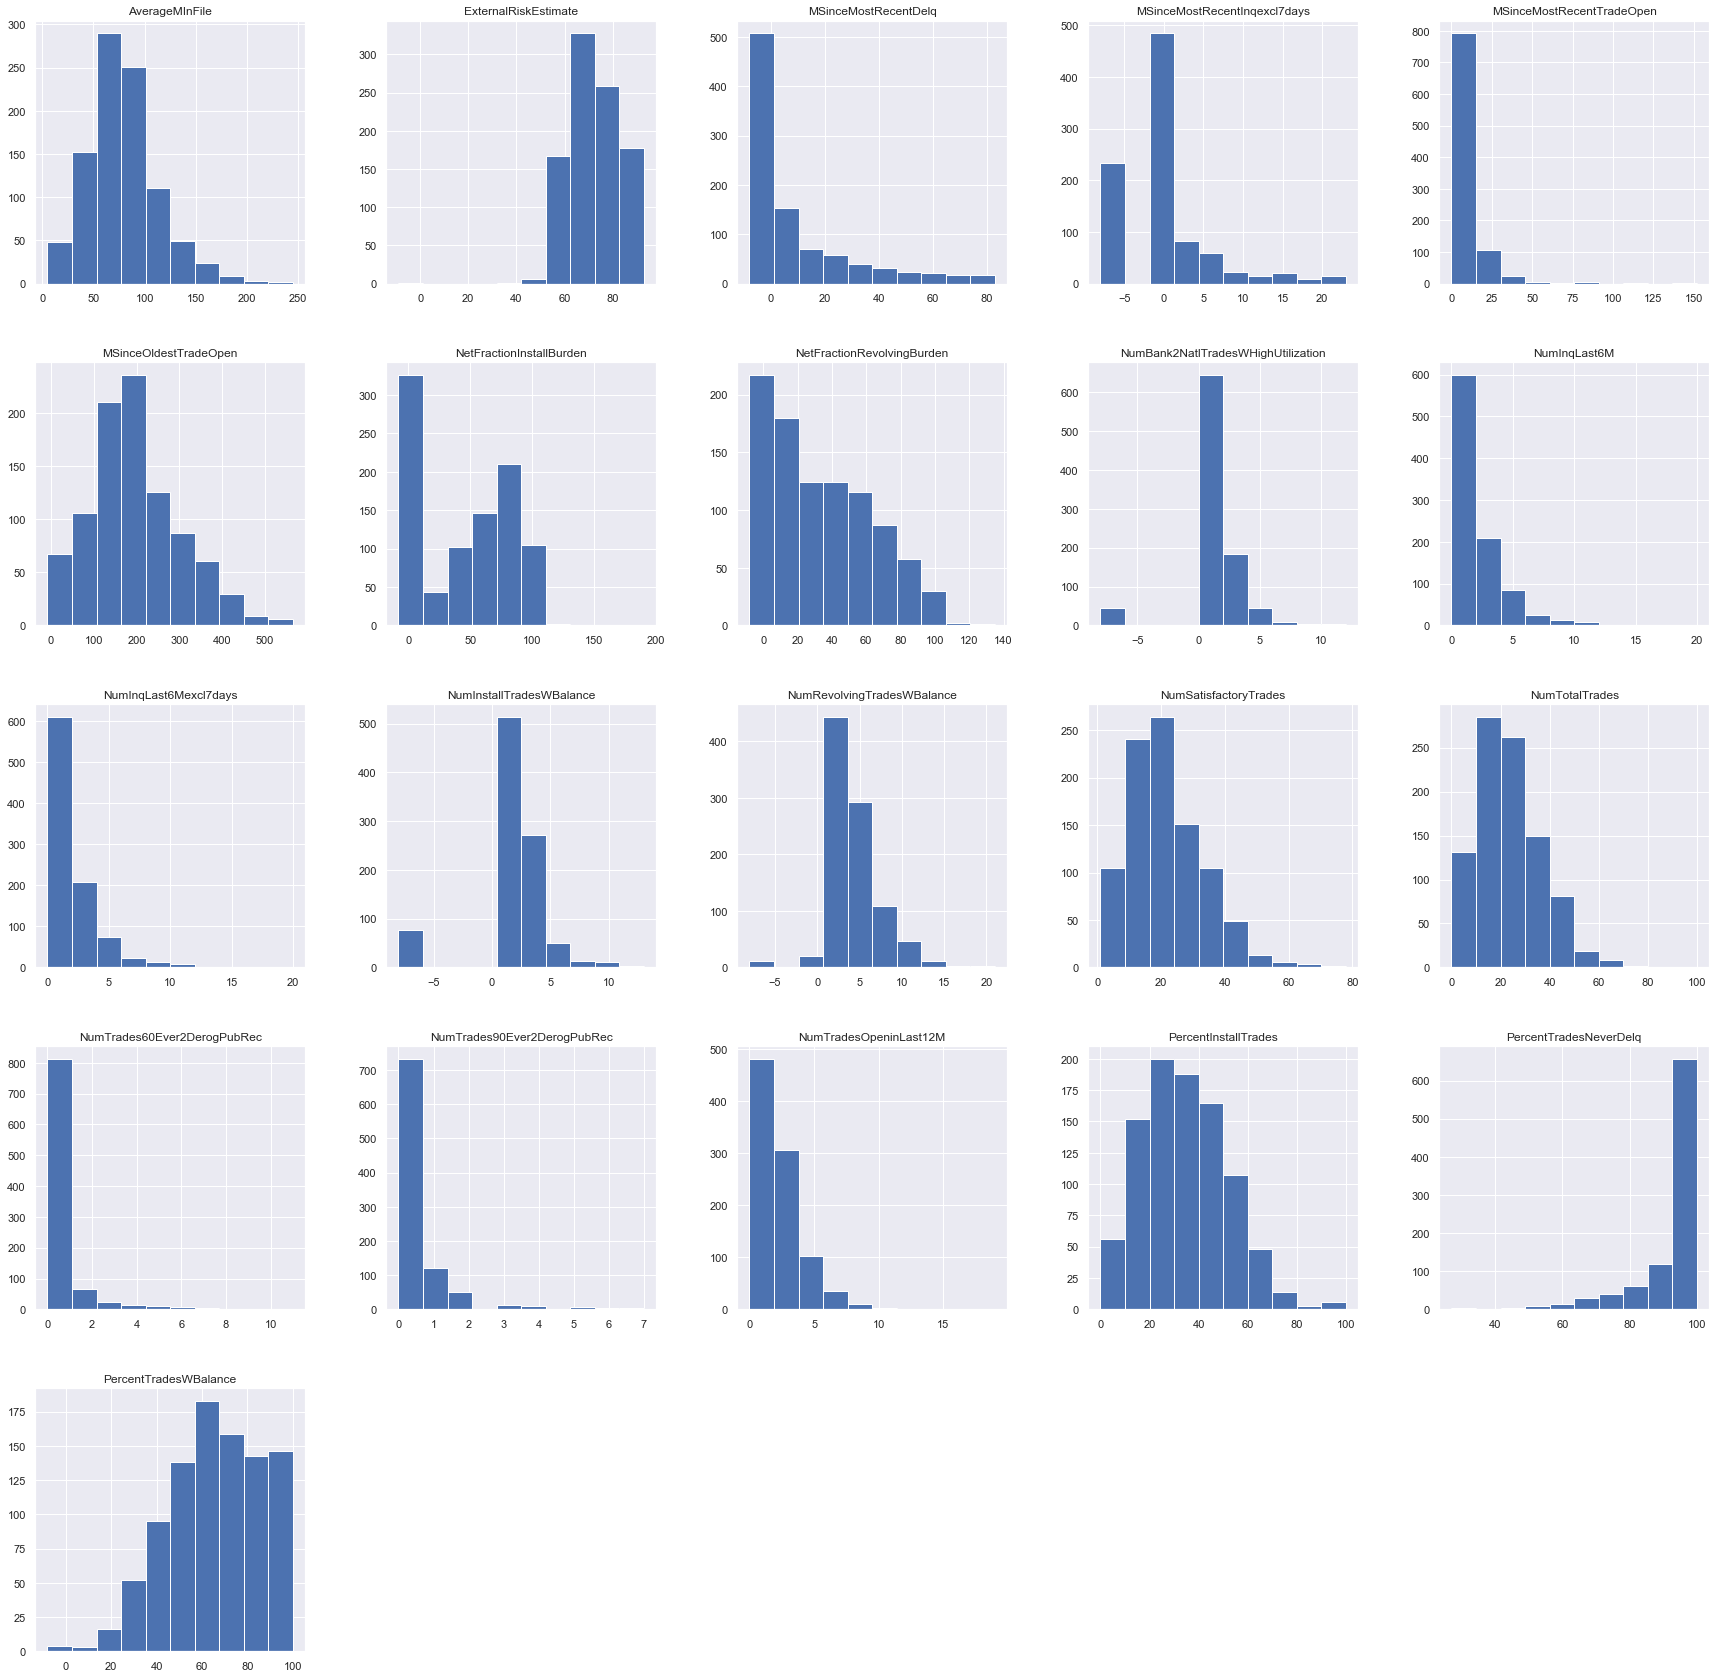

In [22]:
df[continuous_columns].hist(figsize=(30,30))
plt.savefig('continuous_histograms_credit_risk.pdf')

## Box Plot for continuos data

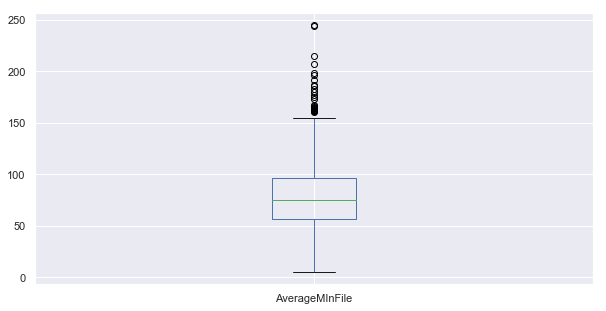

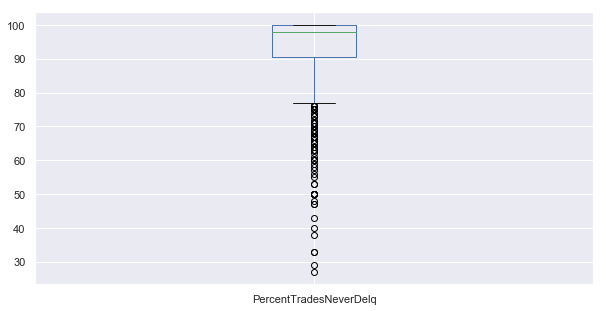

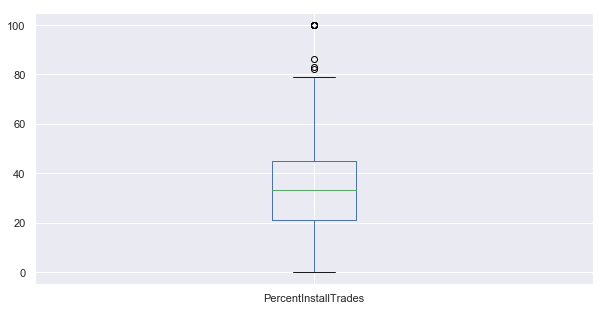

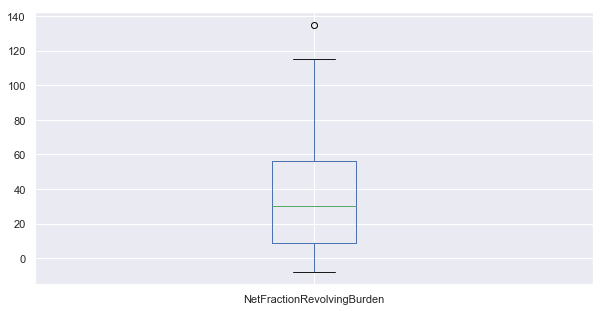

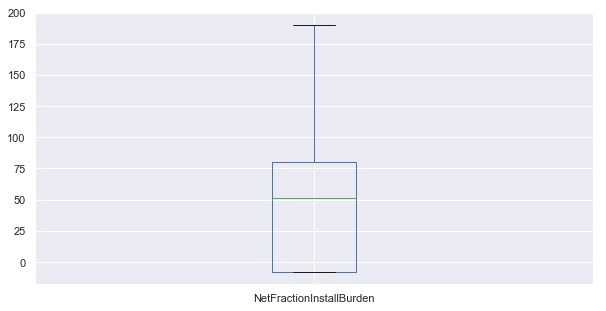

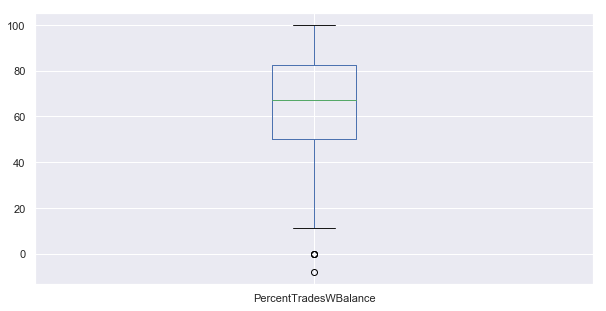

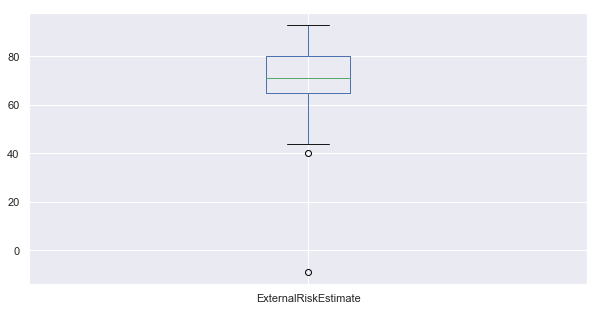

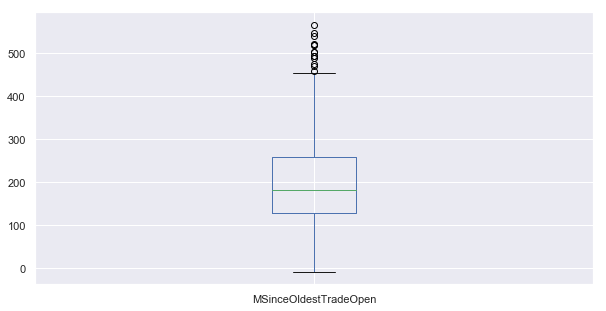

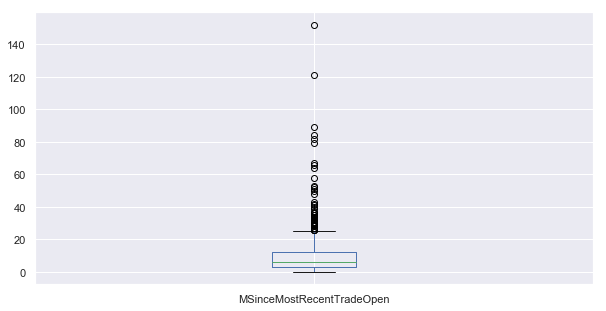

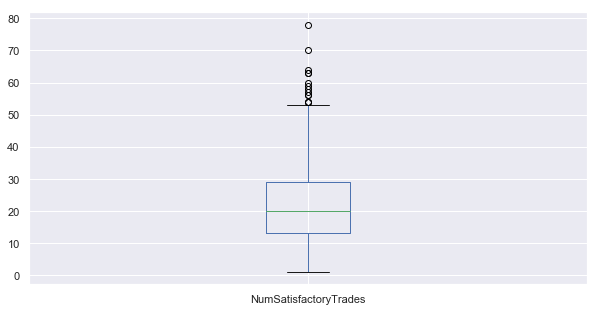

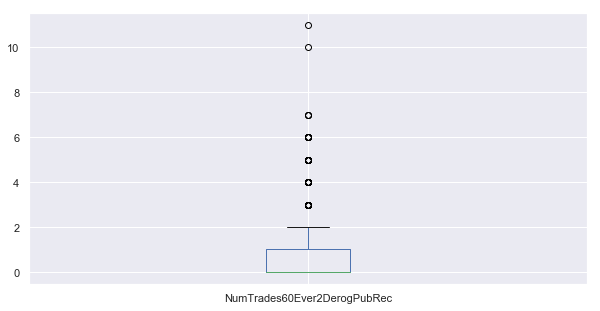

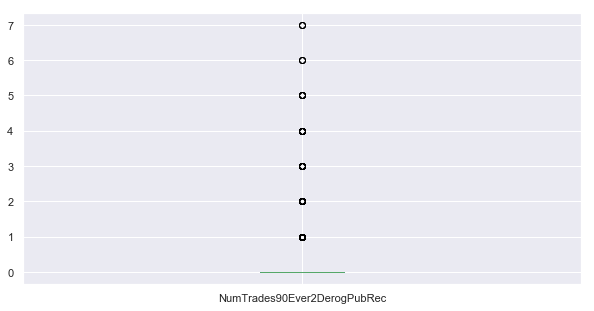

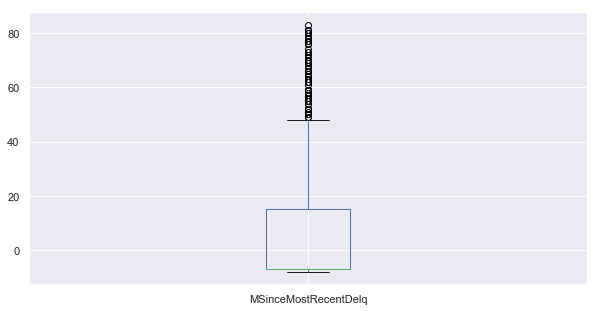

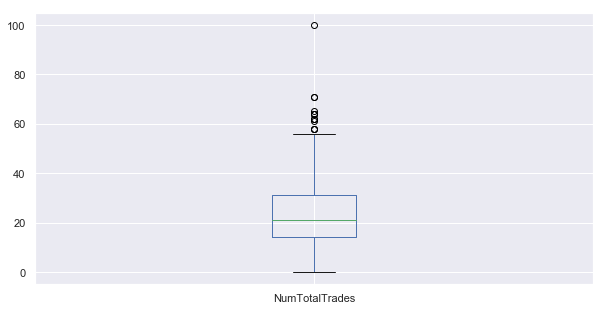

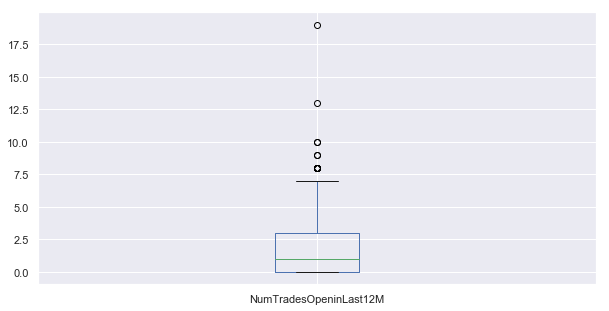

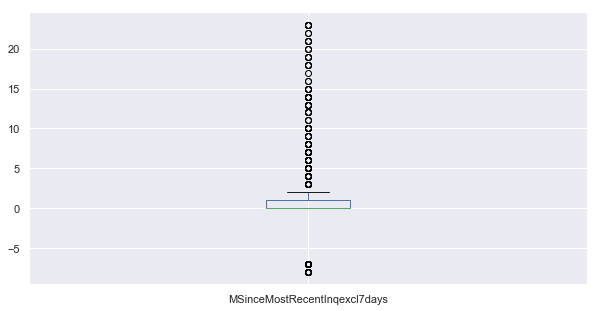

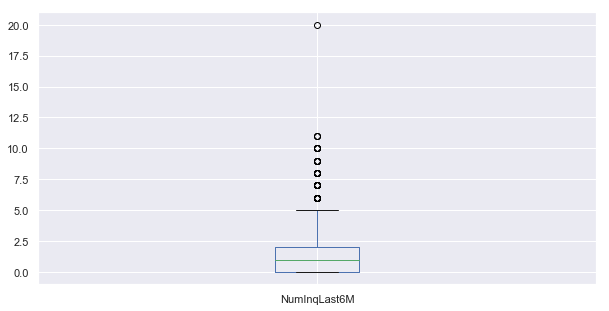

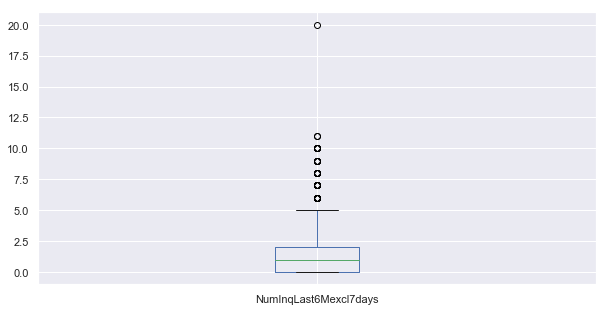

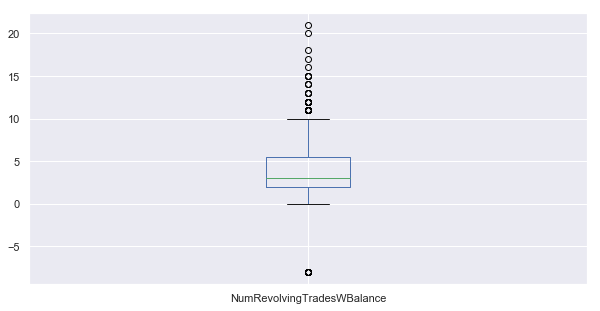

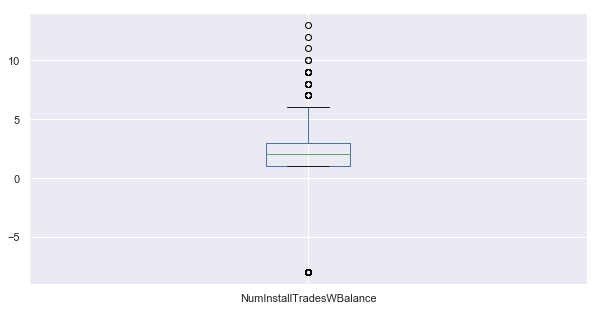

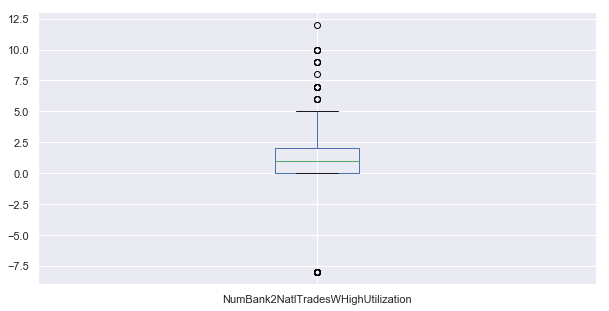

In [23]:
pp = PdfPages('continuous_histograms_Box_Plot_credit_risk.pdf')

for col in continuous_columns:
    f = df[col].plot(kind='box', figsize=(10,5))
    pp.savefig(f.get_figure())
    plt.show()

pp.close()

## Bar Plot for Categorical data

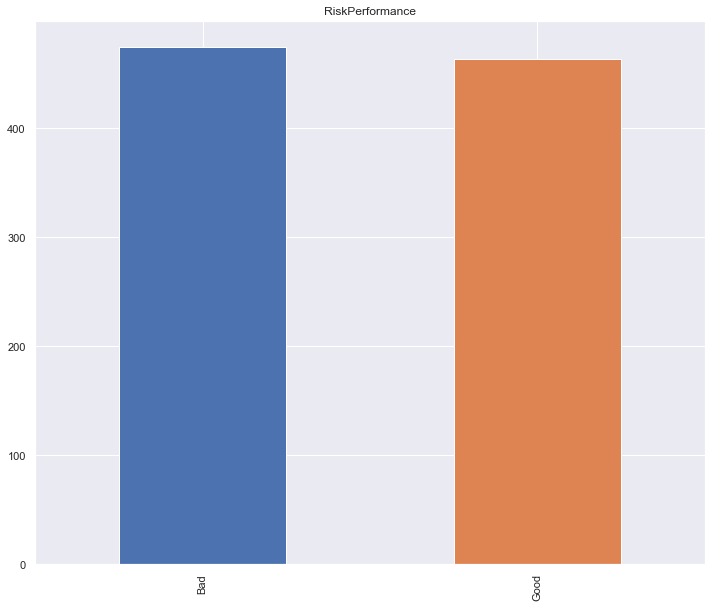

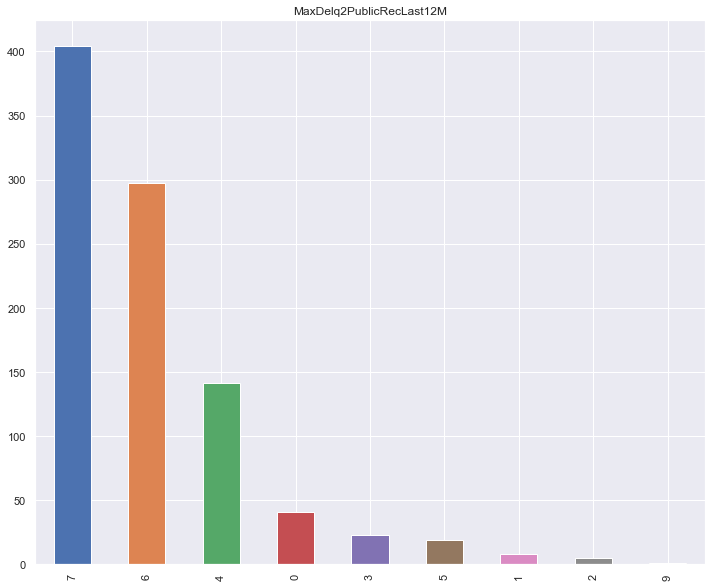

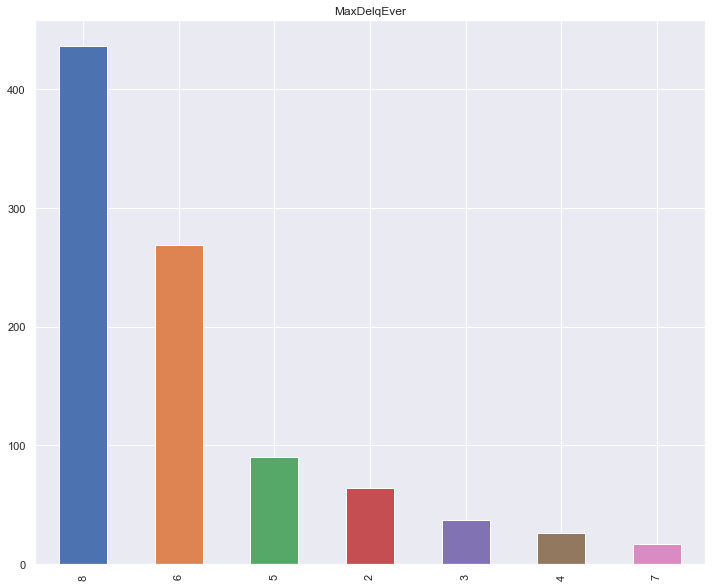

In [24]:
pp = PdfPages('categorical_barcharts_Credit_Risk.pdf')

for column in categorical_columns:
    f = df[column].value_counts().plot(kind='bar', title=column, figsize=(12,10))
    pp.savefig(f.get_figure())
    plt.show()

pp.close()

In [25]:
# maxever delinquency, the 6 bin added to the other ones, roughly add up to the bin 7

# in the MaxDelq2PublicReclast12M has a similar layout, but in this case bin 6 and 5 means unknown delinquency

# There are roughly half bad customers which did not manage to pay as negotioated...
# The good customers are kept to provide a reference when training the system(training the model)




The discussion for the initial findings can be found in a .pdf file called...

# Section 2 prepare a data quality plan

## Mark down all the features where there are potential problems or data quality issues.

- There are several minimum negative values on these columns:
    **ExternalRiskEstimate, NetFractionRevolvingBurden, NetFractionInstallBurden**
    **PercentTradesWBalance, MSinceOldestTradeOpen, MSinceMostRecentDelq**
    **MSinceMostRecentInqexcl7days, NumRevolvingTradesWBalance, NumInstallTradesWBalance** 
    **NumBank2NatlTradesWHighUtilization**
    

- While these other columns contain a large amount of zeros.
    **NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,NumTradesOpeninLast12M,**
    **MSinceMostRecentInqexcl7days,NumInqLast6M, NumInqLast6Mexcl7days**
    
- AverageMinFile has a very high outlier.
- MSinceOldestTradeOpen has a very high outlier.
- Outliers in the box plot needs to be further investigated.
- In addition to the problems stated above, some standard checks will be performed to find       other issues.

## checking for inconsistencies

In [26]:
#checking for irregular cardinality in categorical values.
print("\n-Unique values for:\n- RiskPerformance:", pd.unique(df.RiskPerformance.ravel()))
print("\n-Unique values for:\n- MaxDelq2PublicRecLast12M:", pd.unique(df.MaxDelq2PublicRecLast12M.ravel()))
print("\n-Unique values for:\n- MaxDelqEver:", pd.unique(df.MaxDelqEver.ravel()))


-Unique values for:
- RiskPerformance: ['Good' 'Bad']

-Unique values for:
- MaxDelq2PublicRecLast12M: [7 6 0 4 3 9 5 1 2]

-Unique values for:
- MaxDelqEver: [8 2 6 5 4 7 3]


no apparent inconsistencies or wrongly spelled words

In [27]:
df.isnull().sum()

RiskPerformance                       0
ExternalRiskEstimate                  0
MSinceOldestTradeOpen                 0
MSinceMostRecentTradeOpen             0
AverageMInFile                        0
NumSatisfactoryTrades                 0
NumTrades60Ever2DerogPubRec           0
NumTrades90Ever2DerogPubRec           0
PercentTradesNeverDelq                0
MSinceMostRecentDelq                  0
MaxDelq2PublicRecLast12M              0
MaxDelqEver                           0
NumTotalTrades                        0
NumTradesOpeninLast12M                0
PercentInstallTrades                  0
MSinceMostRecentInqexcl7days          0
NumInqLast6M                          0
NumInqLast6Mexcl7days                 0
NetFractionRevolvingBurden            0
NetFractionInstallBurden              0
NumRevolvingTradesWBalance            0
NumInstallTradesWBalance              0
NumBank2NatlTradesWHighUtilization    0
PercentTradesWBalance                 0
dtype: int64

No unexpected null values.

No additional problems have appeared. 

## Proposed solutions to solve the issues encountered

Considering the context in which these data was extracted, some of the outliers and zero values are to be expected. For all the minimum negative values, if a feature shows a high frequency of those numbers, the feature will probably have to be dropped, as it won't give a useful insight to the data. Whilst if a frequency does not contain a high percentage, the negative numbers can be imputated.
Similarly for features where a high number of values are missing, the feature will be dropped as not providing any usuful information.  


In [28]:
# checking the frequency of numbers below the 0.

print("Frequency of negative values for:\n")
temp_df = df[df['ExternalRiskEstimate'] < 0]
freq = temp_df.ExternalRiskEstimate.count()/df.ExternalRiskEstimate.count()*100
print("- ExternalRiskEstimate:", "{0:.03f}%".format(freq))

temp_df = df[df['NetFractionRevolvingBurden'] < 0]
freq = temp_df.NetFractionRevolvingBurden.count()/df.NetFractionRevolvingBurden.count()*100
print("- NetFractionRevolvingBurden:", "{0:.03f}%".format(freq))

temp_df = df[df['PercentTradesWBalance'] < 0]
freq = temp_df.PercentTradesWBalance.count()/df.PercentTradesWBalance.count()*100
print("- PercentTradesWBalance:", "{0:.03f}%".format(freq))

temp_df = df[df['MSinceOldestTradeOpen'] < 0]
freq = temp_df.MSinceOldestTradeOpen.count()/df.MSinceOldestTradeOpen.count()*100
print("- MSinceOldestTradeOpen:", "{0:.03f}%".format(freq))

temp_df = df[df['MSinceMostRecentDelq'] < 0]
freq = temp_df.MSinceMostRecentDelq.count()/df.MSinceMostRecentDelq.count()*100
print("- MSinceMostRecentDelq:", "{0:.03f}%".format(freq))

temp_df = df[df['MSinceMostRecentInqexcl7days'] < 0]
freq = temp_df.MSinceMostRecentInqexcl7days.count()/df.MSinceMostRecentInqexcl7days.count()*100
print("- MSinceMostRecentInqexcl7days:", "{0:.03f}%".format(freq))

temp_df = df[df['NumRevolvingTradesWBalance'] < 0]
freq = temp_df.NumRevolvingTradesWBalance.count()/df.NumRevolvingTradesWBalance.count()*100
print("- NumRevolvingTradesWBalance:", "{0:.03f}%".format(freq))

temp_df = df[df['NumInstallTradesWBalance'] < 0]
freq = temp_df.NumInstallTradesWBalance.count()/df.NumInstallTradesWBalance.count()*100
print("- NumInstallTradesWBalance:", "{0:.03f}%".format(freq))

temp_df = df[df['NumBank2NatlTradesWHighUtilization'] < 0]
freq = temp_df.NumBank2NatlTradesWHighUtilization.count()/df.NumBank2NatlTradesWHighUtilization.count()*100
print("- NumBank2NatlTradesWHighUtilization:", "{0:.03f}%".format(freq))

Frequency of negative values for:

- ExternalRiskEstimate: 0.106%
- NetFractionRevolvingBurden: 1.384%
- PercentTradesWBalance: 0.106%
- MSinceOldestTradeOpen: 2.982%
- MSinceMostRecentDelq: 50.586%
- MSinceMostRecentInqexcl7days: 24.814%
- NumRevolvingTradesWBalance: 1.278%
- NumInstallTradesWBalance: 8.200%
- NumBank2NatlTradesWHighUtilization: 4.792%


- **ExternalRiskEstimate** still contains one row with a -9 value, which could represent a mistake in the data, hence it will be changed to the mean.

- **MSinceMostRecentDelq** contain the highest number of negative values, in this case the negative values correspond to a lot of (-7s), meaning no delinquency or no data. These values can be imputated to better represent the remaining 50% of useful data.

- **MSinceMostRecentInqexcl7days** contains a very high number of negative values that like for the **remaining features will be imputated.**


## Imputating negative values

Even if some of the features have a high percentage of negative values, i decided to not drop any of the features. This is due to the nature of the data, where a negative value has the same meaning as a zero, no delinquency, hence they will all be imputed

In [29]:
# translating the negative value to the mean
df['ExternalRiskEstimate'] = df['ExternalRiskEstimate'].replace(-9, 71)

# Check if imputation has been successful
temp_df = df[df['ExternalRiskEstimate'] < 0]
if temp_df.ExternalRiskEstimate.count() == 0:
    print("Imputation successful.")
else:
    print("Error! Negative values still present.")

Imputation successful.


In [30]:
# Replacing all the -7s to zeros
df['MSinceMostRecentDelq'] = df['MSinceMostRecentDelq'].replace(-7, 0)

# Check if imputation has been successful
temp_df = df[df['MSinceMostRecentDelq'] == -7]
if temp_df.ExternalRiskEstimate.count() == 0:
    print("Imputation successful.")
else:
    print("Error! Negative values still present.")

Imputation successful.


In [31]:
# Replacing all the -8s to zeros
df['PercentTradesWBalance'] = df['PercentTradesWBalance'].replace(-8, 0)

# Check if imputation has been successful
temp_df = df[df['PercentTradesWBalance'] < 0]
if temp_df.ExternalRiskEstimate.count() == 0:
    print("Imputation successful.")
else:
    print("Error! Negative values still present.")

Imputation successful.


In [32]:
# Replacing all the -8s to zeros
df['MSinceOldestTradeOpen'] = df['MSinceOldestTradeOpen'].replace(-8, 0)

# Check if imputation has been successful
temp_df = df[df['MSinceOldestTradeOpen'] < 0]
if temp_df.ExternalRiskEstimate.count() == 0:
    print("Imputation successful.")
else:
    print("Error! Negative values still present.")

Imputation successful.


In [33]:
# Replacing all the -8s to zeros
df['NetFractionInstallBurden'] = df['NetFractionInstallBurden'].replace(-8, 0)

# Check if imputation has been successful
temp_df = df[df['NetFractionInstallBurden'] < 0]
if temp_df.ExternalRiskEstimate.count() == 0:
    print("Imputation successful.")
else:
    print("Error! Negative values still present.")

Imputation successful.


In [34]:
# Replacing all the -8s to zeros
df['NetFractionRevolvingBurden'] = df['NetFractionRevolvingBurden'].replace(-8, 0)

# Check if imputation has been successful
temp_df = df[df['NetFractionRevolvingBurden'] < 0]
if temp_df.ExternalRiskEstimate.count() == 0:
    print("Imputation successful.")
else:
    print("Error! Negative values still present.")

Imputation successful.


In [35]:
# Replacing all the -8s to zeros
df['MSinceMostRecentDelq'] = df['MSinceMostRecentDelq'].replace(-8, 0)

# Check if imputation has been successful
temp_df = df[df['MSinceMostRecentDelq'] < 0]
if temp_df.ExternalRiskEstimate.count() == 0:
    print("Imputation successful.")
else:
    print("Error! Negative values still present.")

Imputation successful.


In [36]:
# Replacing all the -8s to zeros
df['MSinceMostRecentInqexcl7days'] = df['MSinceMostRecentInqexcl7days'].replace(-7, 0)
df['MSinceMostRecentInqexcl7days'] = df['MSinceMostRecentInqexcl7days'].replace(-8, 0)
# Check if imputation has been successful
temp_df = df[df['MSinceMostRecentInqexcl7days'] < 0]
if temp_df.ExternalRiskEstimate.count() == 0:
    print("Imputation successful.")
else:
    print("Error! Negative values still present.")

Imputation successful.


In [37]:
# Replacing all the -8s to zeros
df['NumRevolvingTradesWBalance'] = df['NumRevolvingTradesWBalance'].replace(-8, 0)

# Check if imputation has been successful
temp_df = df[df['NumRevolvingTradesWBalance'] < 0]
if temp_df.ExternalRiskEstimate.count() == 0:
    print("Imputation successful.")
else:
    print("Error! Negative values still present.")

Imputation successful.


In [38]:
# Replacing all the -8s to zeros
df['NumInstallTradesWBalance'] = df['NumInstallTradesWBalance'].replace(-8, 0)

# Check if imputation has been successful
temp_df = df[df['NumInstallTradesWBalance'] < 0]
if temp_df.ExternalRiskEstimate.count() == 0:
    print("Imputation successful.")
else:
    print("Error! Negative values still present.")

Imputation successful.


In [39]:
# Replacing all the -8s to zeros
df['NumBank2NatlTradesWHighUtilization'] = df['NumBank2NatlTradesWHighUtilization'].replace(-8, 0)

# Check if imputation has been successful
temp_df = df[df['NumBank2NatlTradesWHighUtilization'] < 0]
if temp_df.ExternalRiskEstimate.count() == 0:
    print("Imputation successful.")
else:
    print("Error! Negative values still present.")

Imputation successful.


In [40]:
# Replacing all the -8s to zeros
df['MSinceMostRecentDelq'] = df['MSinceMostRecentDelq'].replace(-8, 0)

# Check if imputation has been successful
temp_df = df[df['MSinceMostRecentDelq'] < 0]
if temp_df.ExternalRiskEstimate.count() == 0:
    print("Imputation successful.")
else:
    print("Error! Negative values still present.")

Imputation successful.


## Summary of data quality plan

| Feature                                    | Data Quality Issue    | Handling Strategy |
|--------------------------------------------|-----------------------|-------------------|
| **ExternalRiskEstimate**                   | negative value        | imputation        |
| **PercentTradesWBalance**                  | negative value        | imputation        |
| **MSinceOldestTradeOpen**                  | negative values       | imputation        |
| **MSinceMostRecentInqexcl7days**           | negative values (>24%)| imputation        |
| **NetFractionRevolvingBurden**             | negative values       | imputation        |
| **NetFractionInstallBurden**               | negative values       | imputation        |
| **NumRevolvingTradesWBalance**             | negative values       | imputation        |
| **NumInstallTradesWBalance**               | negative values       | imputation        |
| **NumBank2NatlTradesWHighUtilization**     | negative values       | imputation        |
| **MSinceMostRecentDelq**                   | negative values (>50%)| imputation        |
| **NumTrades60Ever2DerogPubRec**            | many 0s               | do nothing        |
| **NumTrades90Ever2DerogPubRec**            | many 0s               | do nothing        |
| **NumTradesOpeninLast12M**                 | many 0s               | do nothing        |
| **NumInqLast6M**                           | many 0s               | do nothing        |
| **NumInqLast6Mexcl7days**                  | many 0s               | do nothing        |
| **MSinceMostRecentTradeOpen**              | outliers              | do nothing        |
| **AverageMInFile**                         | outliers              | do nothing        |
| **NumSatisfactoryTrades**                  | outliers              | do nothing        |
| **NumTotalTrades**                         | outliers              | do nothing        |

## Tables for cleaned data

In [41]:
df[continuous_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
AverageMInFile,939.0,78.570820,34.428568,5.0,56.0,75.0,96.0,245.0
PercentTradesNeverDelq,939.0,92.716720,11.654435,27.0,90.5,98.0,100.0,100.0
PercentInstallTrades,939.0,33.903088,17.344379,0.0,21.0,33.0,45.0,100.0
NetFractionRevolvingBurden,939.0,34.702875,28.941675,0.0,9.0,30.0,56.0,135.0
NetFractionInstallBurden,939.0,45.419595,37.734041,0.0,0.0,51.0,80.0,190.0
PercentTradesWBalance,939.0,66.379127,21.411369,0.0,50.0,67.0,82.5,100.0
ExternalRiskEstimate,939.0,72.108626,9.856157,40.0,65.0,71.0,80.0,93.0
MSinceOldestTradeOpen,939.0,196.111821,105.732309,0.0,128.5,183.0,259.0,565.0
MSinceMostRecentTradeOpen,939.0,9.367412,11.716637,0.0,3.0,6.0,12.0,152.0
NumSatisfactoryTrades,939.0,21.684771,11.766323,1.0,13.0,20.0,29.0,78.0


In [42]:
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
RiskPerformance,939,2,Bad,475
MaxDelq2PublicRecLast12M,939,9,7,404
MaxDelqEver,939,7,8,436


In [43]:
df.to_csv('CreditRisk-18206648_cleaned_vers3.csv', index=False)

# Section 3

### Subset selection
I have decided to look at a pairwise interaction of these features below, to see what predictor variables are included in the model.

I choose to analyze the following features:
- **continuous**
    - AverageMInFile
    - ExternalRiskEstimate
    - NumInqLast6M
    - MSinceMostRecentTradeOpen
    - MSinceOldestTradeOpen
    - NumberSatisfactoryTrades
    - NumTotalTrades
    - NumTrades90Ever2DerogPubRec
    - NumTradesOpeninLast12M
    - PercentTradesNeverDelq

- **categorical**
    - RiskPerformance
    - MaxDelq2PublicRecLast12M
    - MaxDelqEver

## Plot for continuous-continuous

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text xticklabel objects>)

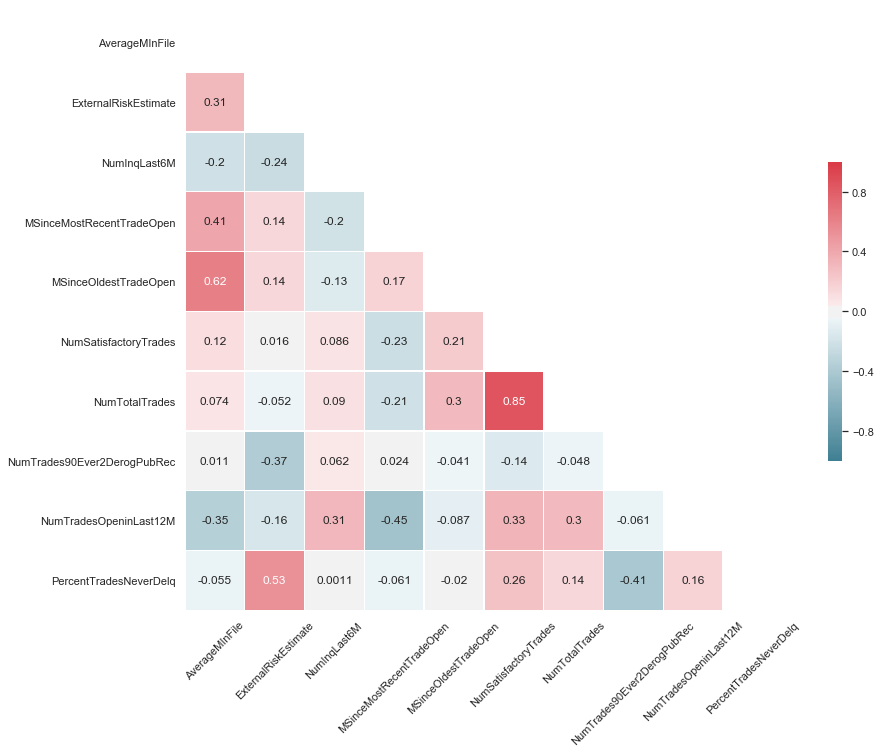

In [44]:
# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="white")

# Select columns containing continuous data
continuous_columns = df[['AverageMInFile',\
                         'ExternalRiskEstimate',\
                         'NumInqLast6M',\
                         'MSinceMostRecentTradeOpen',\
                         'MSinceOldestTradeOpen',\
                         'NumSatisfactoryTrades',\
                         'NumTotalTrades',\
                         'NumTrades90Ever2DerogPubRec',\
                         'NumTradesOpeninLast12M',\
                         'PercentTradesNeverDelq']].columns

# Calculate correlation of all pairs of continuous features
corr = df[continuous_columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

Following we'll plot the pairs with highest correlation

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

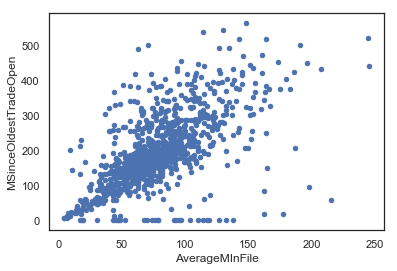

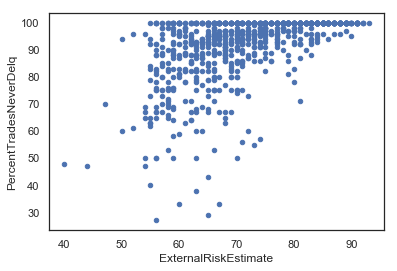

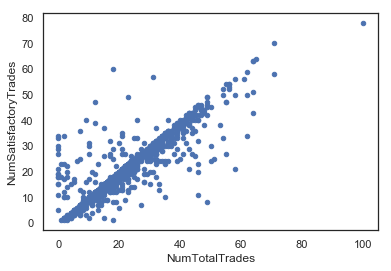

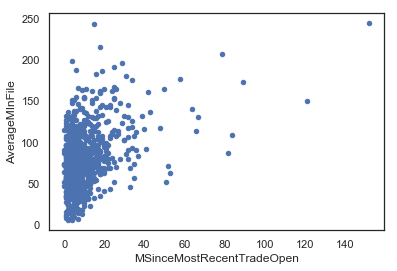

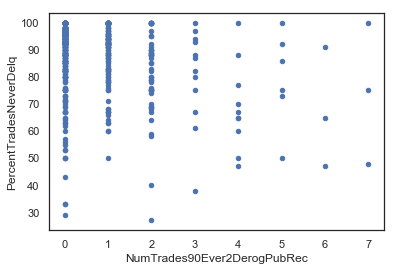

In [45]:
df.plot(kind='scatter', x='AverageMInFile', y='MSinceOldestTradeOpen')
df.plot(kind='scatter', x='ExternalRiskEstimate', y='PercentTradesNeverDelq')
df.plot(kind='scatter', x='NumTotalTrades', y='NumSatisfactoryTrades')
df.plot(kind='scatter', x='MSinceMostRecentTradeOpen', y='AverageMInFile')
df.plot(kind='scatter', x='NumTrades90Ever2DerogPubRec', y='PercentTradesNeverDelq')

## Categorical-categorical

(0, 100)

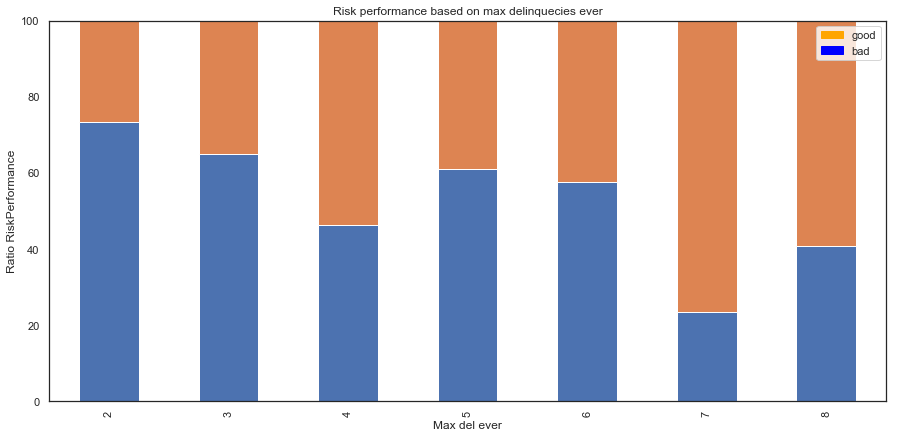

In [46]:
maxdelq = pd.unique(df.MaxDelqEver.ravel())

df['percent'] = 0

for i in maxdelq:
    count = 1 / df[df.MaxDelqEver == i].count()['RiskPerformance']
    index_list = df[df['MaxDelqEver'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count * 100
        
group = df[['percent','MaxDelqEver','RiskPerformance']].groupby(['MaxDelqEver','RiskPerformance']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Risk performance based on max delinquecies ever", figsize=(15,7))

red_patch = mpatches.Patch(color='orange', label='good')
blue_patch = mpatches.Patch(color='blue', label='bad')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

my_plot.set_xlabel("Max del ever")
my_plot.set_ylabel("Ratio RiskPerformance")
my_plot.set_ylim([0,100])

(0, 100)

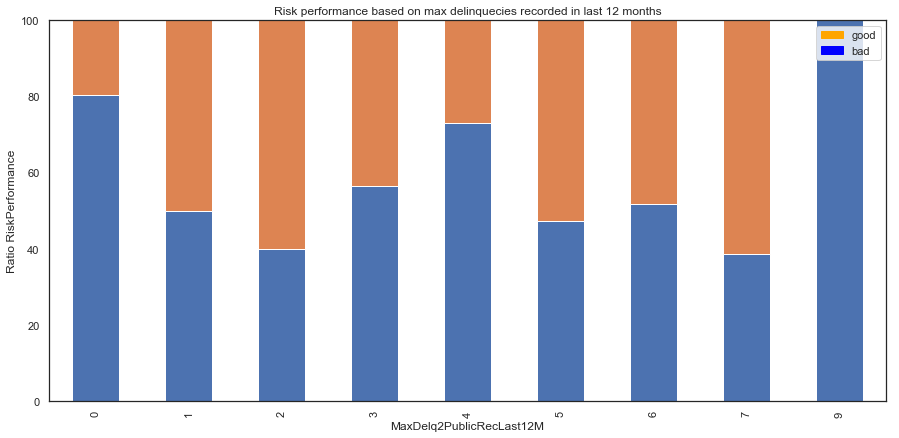

In [47]:
maxdelq = pd.unique(df.MaxDelq2PublicRecLast12M.ravel())

df['percent'] = 0

for i in maxdelq:
    count = 1 / df[df.MaxDelq2PublicRecLast12M == i].count()['RiskPerformance']
    index_list = df[df['MaxDelq2PublicRecLast12M'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count * 100
        
group = df[['percent','MaxDelq2PublicRecLast12M','RiskPerformance']].groupby(['MaxDelq2PublicRecLast12M','RiskPerformance']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Risk performance based on max delinquecies recorded in last 12 months", figsize=(15,7))

red_patch = mpatches.Patch(color='orange', label='good')
blue_patch = mpatches.Patch(color='blue', label='bad')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

my_plot.set_xlabel("MaxDelq2PublicRecLast12M")
my_plot.set_ylabel("Ratio RiskPerformance")
my_plot.set_ylim([0,100])

## Continuous-categorical plots

<Figure size 432x288 with 0 Axes>

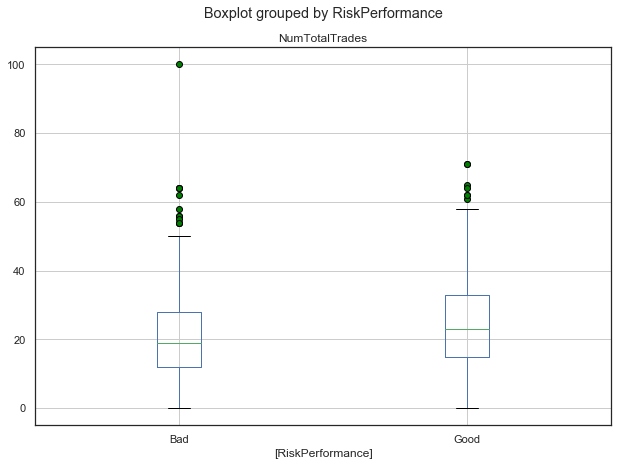

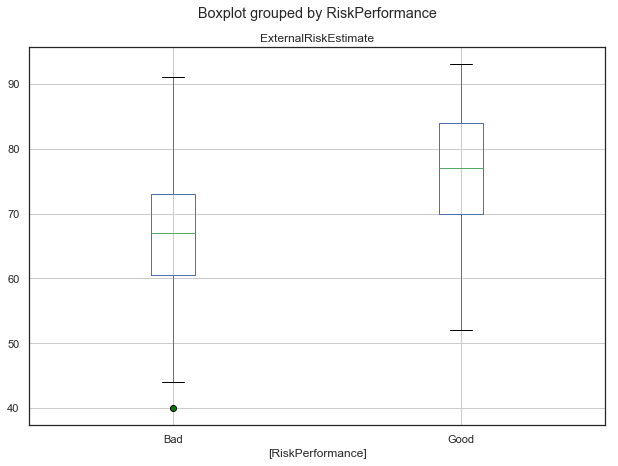

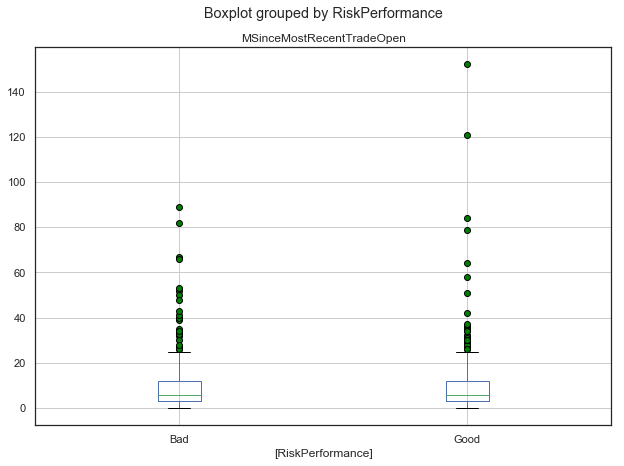

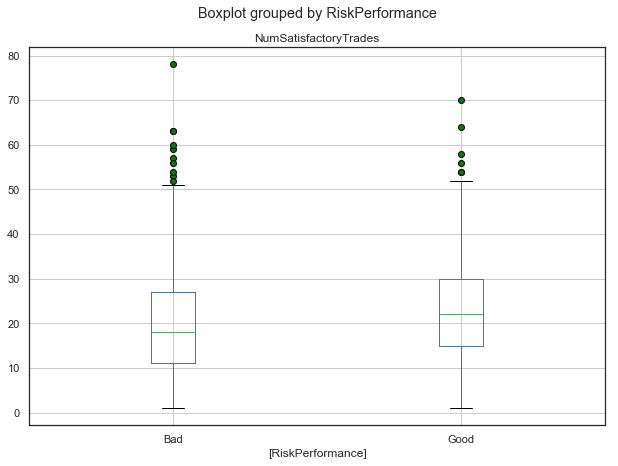

In [48]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
df.boxplot(column=['NumTotalTrades'], by=['RiskPerformance'], flierprops=flierprops, figsize=(10,7))
df.boxplot(column=['ExternalRiskEstimate'], by=['RiskPerformance'], flierprops=flierprops, figsize=(10,7))
df.boxplot(column=['MSinceMostRecentTradeOpen'], by=['RiskPerformance'], flierprops=flierprops, figsize=(10,7))
df.boxplot(column=['NumSatisfactoryTrades'], by=['RiskPerformance'], flierprops=flierprops, figsize=(10,7))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2277ac50>]],
      dtype=object)

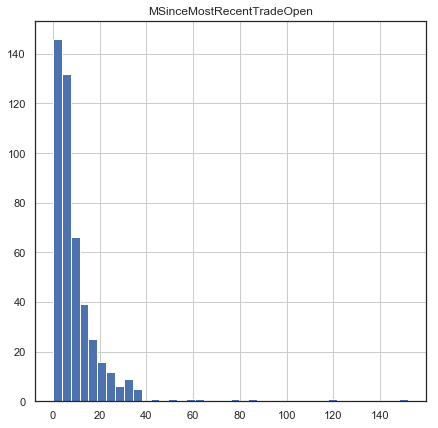

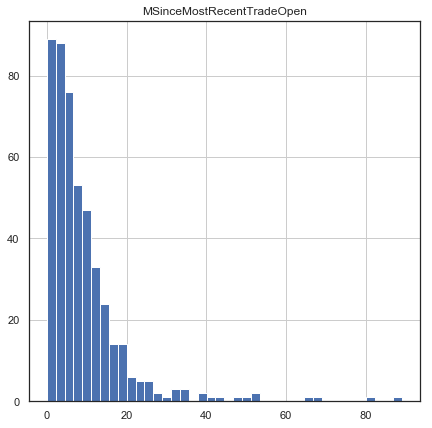

In [49]:
df[df['RiskPerformance'] == 'Good'][['MSinceMostRecentTradeOpen']].hist(figsize=(7,7), bins=40)
df[df['RiskPerformance'] == 'Bad'][['MSinceMostRecentTradeOpen']].hist(figsize=(7,7), bins=40)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a22acf438>]],
      dtype=object)

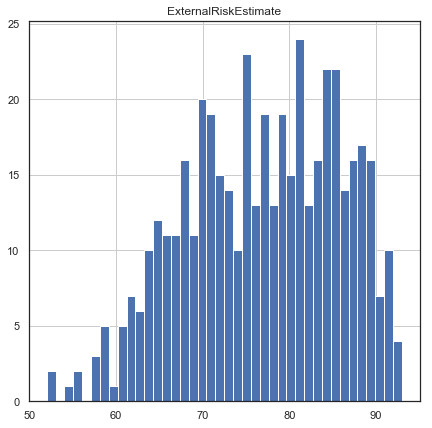

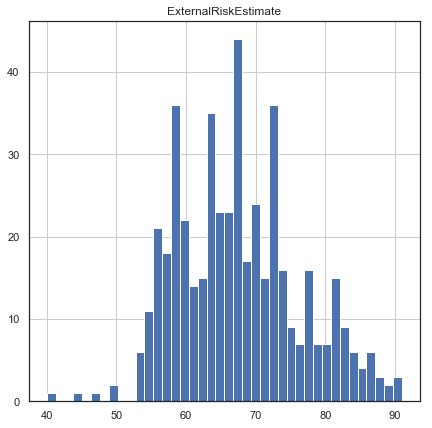

In [50]:
df[df['RiskPerformance'] == 'Good'][['ExternalRiskEstimate']].hist(figsize=(7,7), bins=40)
df[df['RiskPerformance'] == 'Bad'][['ExternalRiskEstimate']].hist(figsize=(7,7), bins=40)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a24e67518>]],
      dtype=object)

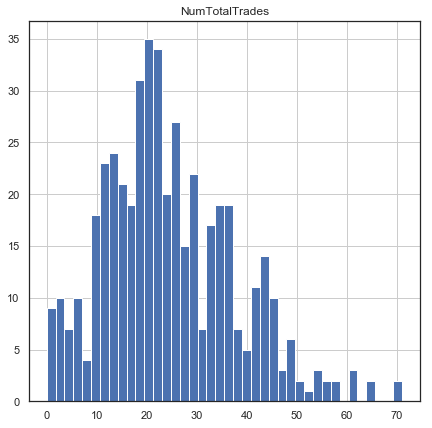

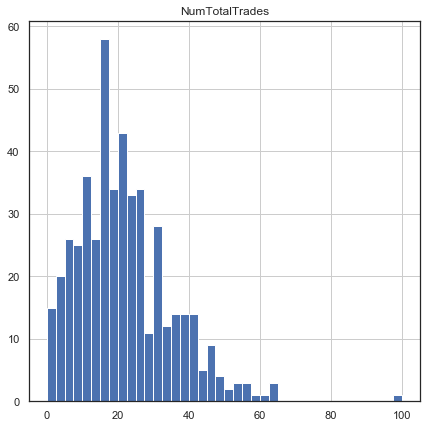

In [51]:
df[df['RiskPerformance'] == 'Good'][['NumTotalTrades']].hist(figsize=(7,7), bins=40)
df[df['RiskPerformance'] == 'Bad'][['NumTotalTrades']].hist(figsize=(7,7), bins=40)

Looking at the plots for the cleaned data, it is still clear that there are inconsistencies in the dataset. The correlations between pair shows more or less the predicted outcome.
Again considering the context in which the data was gathered, some difficulties in the precision is also to be expected.
More reasearch is needed to fully understand all the correlations, in order to work on a prediction model.